# Step 1: Importing required libraries

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprocessing

In [23]:
# Loading Dataset

dataset = pd.read_csv('book.csv', encoding = "ISO-8859-1")

In [24]:
# dataset first five row display.

dataset.head()

Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6

In [25]:
# dataset column names

dataset.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [26]:
# dropping 'Unnamed: 0' column since it is serial number column

dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [27]:
# dataset shape

dataset.shape

(10000, 3)

In [28]:
# changing column names 

dataset.columns = ['User_ID', 'Book_Title', 'Book_Rating']

In [29]:
# datatypes & null value info.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [30]:
# total numbers of user in dataset

dataset.User_ID.nunique()

2182

In [31]:
# Total Numbers of books in the dataset

dataset.Book_Title.nunique()

9659

In [32]:
# removing repeated rows which are same since one user can rate one book only once.

dataset = dataset.drop_duplicates()
dataset.head()

User_ID                                         Book_Title  Book_Rating
0   276726                                Classical Mythology            5
1   276729                                       Clara Callan            3
2   276729                               Decision in Normandy            6
3   276736  Flu: The Story of the Great Influenza Pandemic...            8
4   276737                             The Mummies of Urumchi            6

In [33]:
dataset.shape

(9998, 3)

# Step 2: EDA

 ### 1. Most read book by all users

In [34]:
read_count = pd.DataFrame(dataset.Book_Title.value_counts())

In [35]:
read_count.columns = ['no. of times book read']

In [36]:
read_count.head()

no. of times book read
Fahrenheit 451                                                        5
The Subtle Knife (His Dark Materials, Book 2)                         4
The Amber Spyglass (His Dark Materials, Book 3)                       4
Charlie and the Chocolate Factory                                     4
Vanished                                                              4

In [37]:
print('min. reading count:',read_count.values.min())
print('max. reading count:',read_count.values.max())

min. reading count: 1
max. reading count: 5


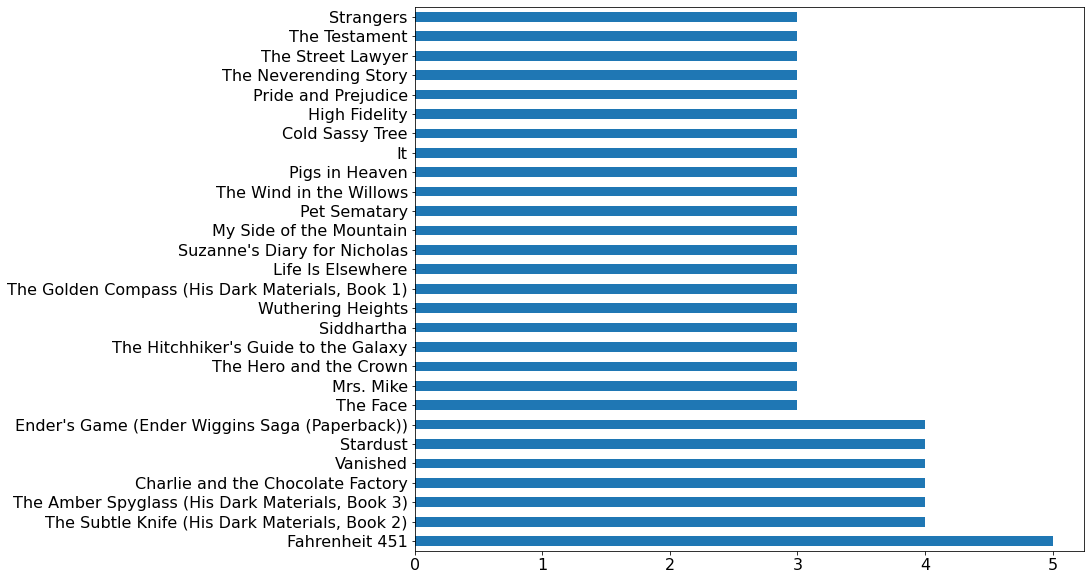

In [38]:
# Books most read frequency plot (read trice or more than that)

figsize = plt.subplots(figsize=(12,10))
read_count[read_count['no. of times book read']>=3].transpose().xs('no. of times book read').plot(kind='barh',fontsize=16)
plt.show()

 ### 2. Rating frequency count

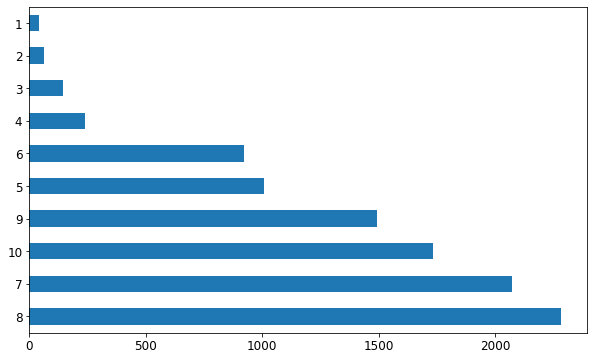

In [39]:
figsize =  plt.subplots(figsize=(10,6))
dataset.Book_Rating.value_counts().plot(kind='barh', fontsize=12)
plt.show()

Max. users given rating points: 8 no.

In [107]:
dataset1 = dataset.pivot_table(index='User_ID',columns='Book_Title', values='Book_Rating')

In [108]:
dataset1.head()

Book_Title   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
User_ID                                                                        
8                            NaN                                         NaN   
9                            NaN                                         NaN   
10                           NaN                                         NaN   
12                           NaN                                         NaN   
14                           NaN                                         NaN   

Book_Title   Repairing PC Drives &amp  '48  \
User_ID                                      
8                                 NaN  NaN   
9                                 NaN  NaN   
10                                NaN  NaN   
12                                NaN  NaN   
14                                NaN  NaN   

Book_Title  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
User_ID                                                                             
8                                                         NaN                       
9                                                         NaN                       
10                                                        NaN                       
12                                                        NaN                       
14                                                        NaN                       

Book_Title  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
User_ID                                                                    
8                                                         NaN              
9                                                         NaN              
10                                                        NaN              
12                                                        NaN              
14                                                        NaN              

Book_Title  01-01-00: A Novel of the Millennium  \
User_ID                                           
8                                           NaN   
9                                           NaN   
10                                          NaN   
12                                          NaN   
14                                          NaN   

Book_Title  1,401 More Things That P*Ss Me Off  10 Commandments Of Dating  \
User_ID                                                                     
8                                          NaN                        NaN   
9                                          NaN                        NaN   
10                                         NaN                        NaN   
12                                         NaN                        NaN   
14                                         NaN                        NaN   

Book_Title  100 Great Fantasy Short, Short Stories  ...  \
User_ID                                             ...   
8                                              NaN  ...   
9                                              NaN  ...   
10                                             NaN  ...   
12                                             NaN  ...   
14                                             NaN  ...   

Book_Title  Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)  \
User_ID                                                                   
8                                                         NaN             
9                                                         NaN             
10                                                        NaN             
12                                                        NaN             
14                                                        NaN             

Book_Title  \Even Monkeys Fall from Trees\ and Other Japanese Proverbs  \
User_ID                                                                  
8

In [109]:
dataset1.fillna(0, inplace=True)

In [117]:
dataset1.head(5)

Book_Title   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
User_ID                                                                        
8                            0.0                                         0.0   
9                            0.0                                         0.0   
10                           0.0                                         0.0   
12                           0.0                                         0.0   
14                           0.0                                         0.0   

Book_Title   Repairing PC Drives &amp  '48  \
User_ID                                      
8                                 0.0  0.0   
9                                 0.0  0.0   
10                                0.0  0.0   
12                                0.0  0.0   
14                                0.0  0.0   

Book_Title  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
User_ID                                                                             
8                                                         0.0                       
9                                                         0.0                       
10                                                        0.0                       
12                                                        0.0                       
14                                                        0.0                       

Book_Title  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
User_ID                                                                    
8                                                         0.0              
9                                                         0.0              
10                                                        0.0              
12                                                        0.0              
14                                                        0.0              

Book_Title  01-01-00: A Novel of the Millennium  \
User_ID                                           
8                                           0.0   
9                                           0.0   
10                                          0.0   
12                                          0.0   
14                                          0.0   

Book_Title  1,401 More Things That P*Ss Me Off  10 Commandments Of Dating  \
User_ID                                                                     
8                                          0.0                        0.0   
9                                          0.0                        0.0   
10                                         0.0                        0.0   
12                                         0.0                        0.0   
14                                         0.0                        0.0   

Book_Title  100 Great Fantasy Short, Short Stories  ...  \
User_ID                                             ...   
8                                              0.0  ...   
9                                              0.0  ...   
10                                             0.0  ...   
12                                             0.0  ...   
14                                             0.0  ...   

Book_Title  Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)  \
User_ID                                                                   
8                                                         0.0             
9                                                         0.0             
10                                                        0.0             
12                                                        0.0             
14                                                        0.0             

Book_Title  \Even Monkeys Fall from Trees\ and Other Japanese Proverbs  \
User_ID                                                                  
8

In [118]:
dataset1.tail(5)

Book_Title   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
User_ID                                                                        
278846                       0.0                                         0.0   
278849                       0.0                                         0.0   
278851                       0.0                                         0.0   
278852                       0.0                                         0.0   
278854                       0.0                                         0.0   

Book_Title   Repairing PC Drives &amp  '48  \
User_ID                                      
278846                            0.0  0.0   
278849                            0.0  0.0   
278851                            0.0  0.0   
278852                            0.0  0.0   
278854                            0.0  0.0   

Book_Title  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
User_ID                                                                             
278846                                                    0.0                       
278849                                                    0.0                       
278851                                                    0.0                       
278852                                                    0.0                       
278854                                                    0.0                       

Book_Title  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
User_ID                                                                    
278846                                                    0.0              
278849                                                    0.0              
278851                                                    0.0              
278852                                                    0.0              
278854                                                    0.0              

Book_Title  01-01-00: A Novel of the Millennium  \
User_ID                                           
278846                                      0.0   
278849                                      0.0   
278851                                      0.0   
278852                                      0.0   
278854                                      0.0   

Book_Title  1,401 More Things That P*Ss Me Off  10 Commandments Of Dating  \
User_ID                                                                     
278846                                     0.0                        0.0   
278849                                     0.0                        0.0   
278851                                     0.0                        0.0   
278852                                     0.0                        0.0   
278854                                     0.0                        0.0   

Book_Title  100 Great Fantasy Short, Short Stories  ...  \
User_ID                                             ...   
278846                                         0.0  ...   
278849                                         0.0  ...   
278851                                         0.0  ...   
278852                                         0.0  ...   
278854                                         0.0  ...   

Book_Title  Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)  \
User_ID                                                                   
278846                                                    0.0             
278849                                                    0.0             
278851                                                    0.0             
278852                                                    0.0             
278854                                                    0.0             

Book_Title  \Even Monkeys Fall from Trees\ and Other Japanese Proverbs  \
User_ID                                                                  
2